In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

from tqdm import tqdm

# Explooratory Data Analysis 
choosing which sensors to keep

In [2]:
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD002.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


In [3]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

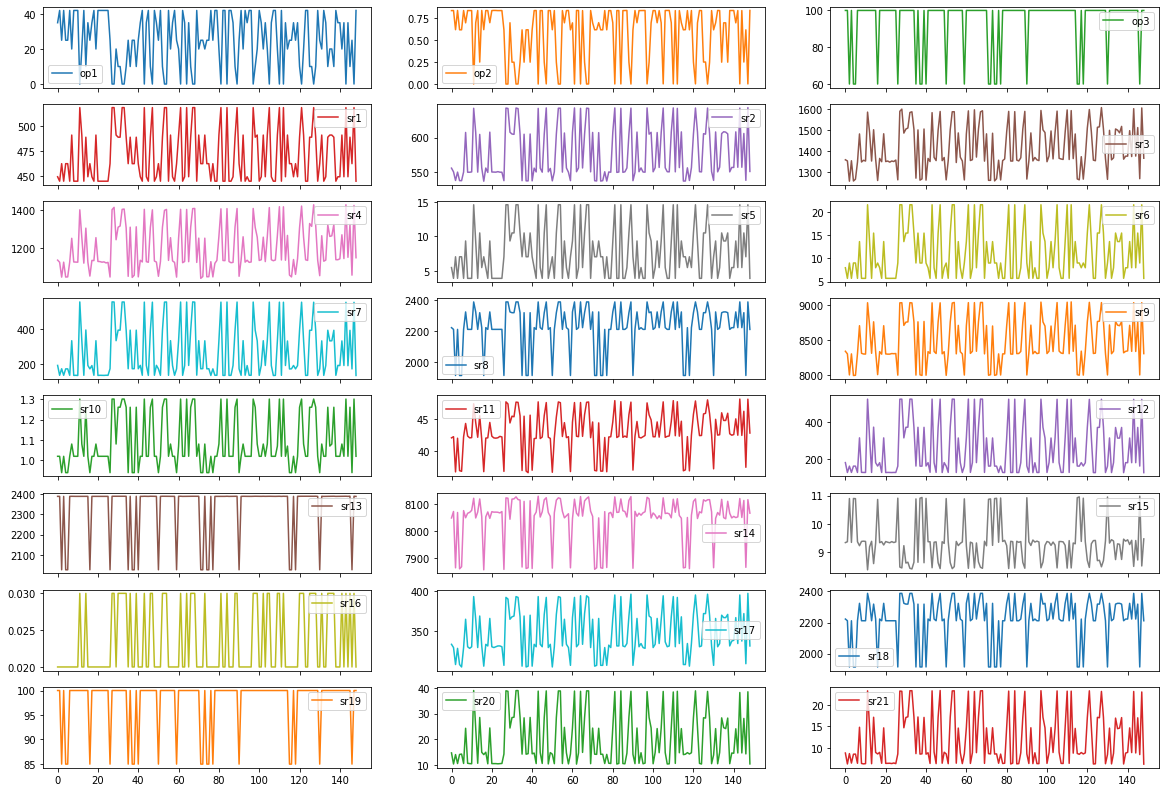

In [4]:
df_1=df[df['unit']==1].iloc[:,2:]
df_1[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

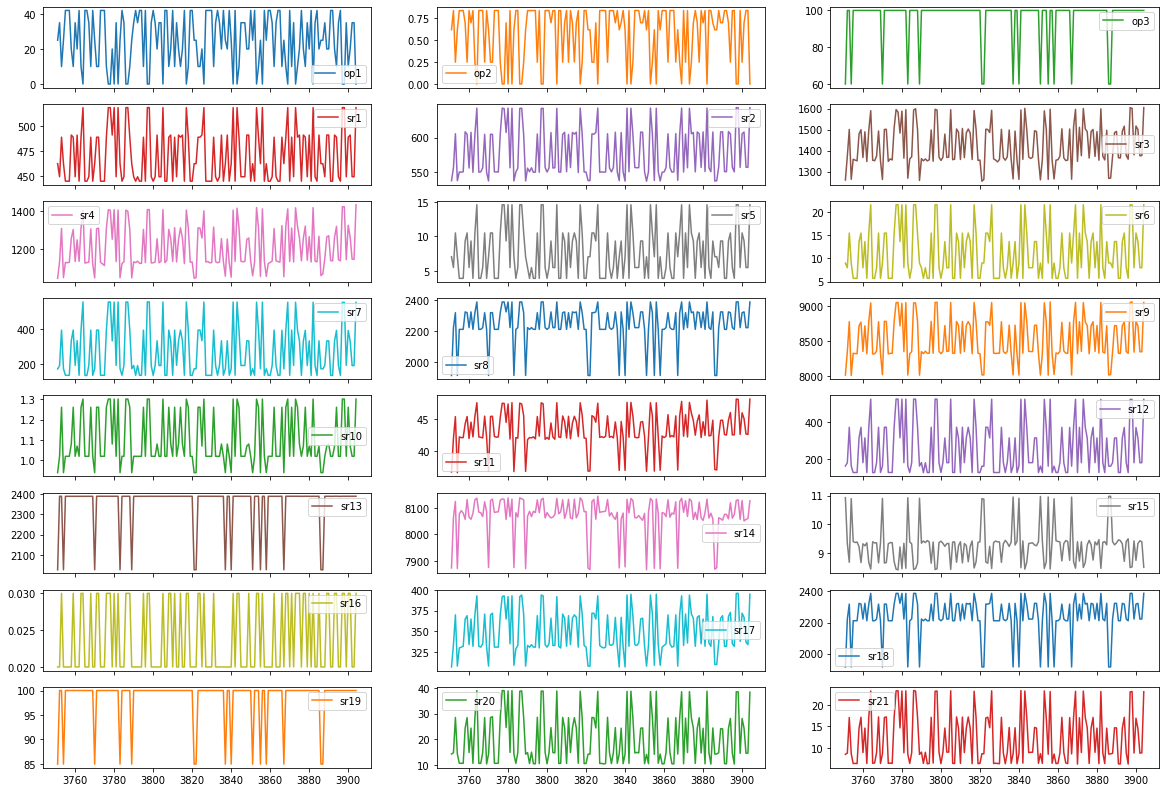

In [5]:
df_20=df[df['unit']==20].iloc[:,2:]
df_20[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

For FD002, we choose to remove all OP and keep all sensors

In [6]:
sensor_columns = [f'sr{i}' for i in range(1, 22)]
unique_values_per_sensor = df[sensor_columns].nunique()

high_variability_threshold = 5000

# Select columns with unique values greater than the threshold
high_variability_sensors = unique_values_per_sensor[unique_values_per_sensor > high_variability_threshold].index.tolist()

# Display the columns that meet the high variability threshold
high_variability_sensors

['sr3', 'sr4', 'sr9', 'sr14', 'sr15', 'sr21']

In [7]:
unique_values_per_sensor

sr1         6
sr2      1590
sr3     12305
sr4     15411
sr5         6
sr6        14
sr7      2067
sr8       897
sr9     22434
sr10        9
sr11      681
sr12     1672
sr13      514
sr14    14905
sr15     8464
sr16        2
sr17       53
sr18        6
sr19        2
sr20      510
sr21    17837
dtype: int64

# Data processing for ML predictive modelling using TSfresh

In [3]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [4]:
window_size = 60
rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": 5,
    "rolling_direction": 1
}

# Function to roll time series data
def roll_data(df, **params):
    return roll_time_series(df, **params)

# Roll the datasets
rolled_df = roll_data(df, **rolling_params)
rolled_test = roll_data(test, **rolling_params)

rolled_df

Rolling: 100%|██████████| 53/53 [00:10<00:00,  5.15it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,0.02,334,2223,100.00,14.73,8.8071,149,148,130,"(1, 6)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,0.02,330,2212,100.00,10.41,6.2665,149,147,130,"(1, 6)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,0.02,309,1915,84.93,14.08,8.6723,149,146,130,"(1, 6)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,0.02,329,2212,100.00,10.59,6.4701,149,145,130,"(1, 6)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,0.02,309,1915,84.93,14.13,8.5286,149,144,130,"(1, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748175,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,0.03,369,2324,100.00,24.36,14.5189,316,4,4,"(260, 316)"
2748176,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,0.03,374,2319,100.00,28.10,16.9454,316,3,3,"(260, 316)"
2748177,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,0.02,310,1915,84.93,14.19,8.5503,316,2,2,"(260, 316)"
2748178,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,0.02,311,1915,84.93,14.05,8.3729,316,1,1,"(260, 316)"


In [10]:
selected_cols=['id', 'sr1','sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']
selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

unique_ids = selected_df['id'].unique()

# Split the unique ids into two halves
midpoint = len(unique_ids) // 2
first_half_ids = unique_ids[:midpoint]  # First half of unique ids
second_half_ids = unique_ids[midpoint:]  # Second half of unique ids

# Filter the DataFrame for each half based on the unique ids
first_half_df = selected_df[selected_df['id'].isin(first_half_ids)]
second_half_df = selected_df[selected_df['id'].isin(second_half_ids)]

print(len(first_half_df)+ len(second_half_df))

2761440


In [11]:
extraction_settings = EfficientFCParameters()

# Helper function to extract features
def extract_features_helper(df, **params):
    return extract_features(df, **params)

# Common parameters for feature extraction
feature_params = {
    "column_id": "id",
    "impute_function": impute,
    "default_fc_parameters": extraction_settings
}

# Apply feature extraction
X1 = extract_features_helper(first_half_df, **feature_params)
X2 = extract_features_helper(second_half_df, **feature_params)
X = pd.concat([X1, X2], axis=0)

x_test = extract_features_helper(selected_test, **feature_params)

Feature Extraction: 100%|██████████| 60/60 [37:56<00:00, 37.94s/it]   


In [ ]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)

In [13]:
X.to_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X.csv', index=False)
X_filtered.to_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X_filtered.csv', index=False)
x_test.to_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X_test.csv', index=False)

In [6]:
X = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X.csv')
X_filtered = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X_filtered.csv')
x_test = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD002_X_test.csv')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [53]:
print(selected_features)

Index(['sr1__sum_values', 'sr11__quantile__q_0.3', 'sr11__quantile__q_0.4',
       'sr11__quantile__q_0.6', 'sr11__quantile__q_0.7',
       'sr11__quantile__q_0.8', 'sr11__quantile__q_0.9',
       'sr11__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'sr11__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'sr11__number_cwt_peaks__n_1',
       ...
       'sr20__fft_coefficient__attr_"real"__coeff_30',
       'sr17__fft_coefficient__attr_"real"__coeff_25',
       'sr13__fft_coefficient__attr_"angle"__coeff_3',
       'sr4__fft_coefficient__attr_"angle"__coeff_19',
       'sr7__fft_coefficient__attr_"real"__coeff_30',
       'sr21__fft_coefficient__attr_"real"__coeff_30',
       'sr12__fft_coefficient__attr_"real"__coeff_30',
       'sr1__fft_coefficient__attr_"real"__coeff_25',
       'sr20__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)',
       'sr21__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)'],
      dtype='object', length=7213)


# ML model prediction

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [48]:
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

In [13]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD002.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 10.10594709471376
S-score: 1.599498383000104
---------------------
XGBRegressor model - Test Set
Test RMSE: 27.419706634642957
Test score: 58.146116734391896
---------------------
RandomForestRegressor model - Validation Set
RMSE: 8.27714926881288
S-score: 1.0374200360448118
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 30.382875796157876
Test score: 75.3145531278636
---------------------
MLPRegressor model - Validation Set
RMSE: 4.262628224296166
S-score: 0.44277230528805905
---------------------
MLPRegressor model - Test Set
Test RMSE: 29.357905609343895
Test score: 47.03776458449423
---------------------
                   model   rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  10.105947  1.599498  27.419707   58.146117
1  RandomForestRegressor   8.277149  1.037420  30.382876   75.314553
2           MLPRegressor   4.262628  0.442772  29.357906   47.037765


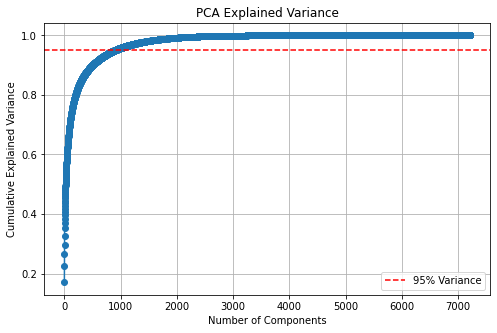

Optimal number of components for 95% variance: 900


In [44]:
from sklearn.decomposition import PCA
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [51]:
pca = PCA(n_components=900)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train_reduced, y_train, X_val_reduced, y_val, X_test=X_test_reduced, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 21.032525210256413
S-score: 11.996764084534968
---------------------
XGBRegressor model - Test Set
Test RMSE: 37.055930410101446
Test score: 211.66095686167094
---------------------
RandomForestRegressor model - Validation Set
RMSE: 28.841023554361083
S-score: 30.151649705963298
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 44.429296041579725
Test score: 267.90935585122133
---------------------
MLPRegressor model - Validation Set
RMSE: 4.825394821607933
S-score: 0.4468278922425919
---------------------
MLPRegressor model - Test Set
Test RMSE: 30.730762162184647
Test score: 64.8699161999384
---------------------
                   model   rmse_val    s_score  rmse_test  test_score
0           XGBRegressor  21.032525  11.996764  37.055930  211.660957
1  RandomForestRegressor  28.841024  30.151650  44.429296  267.909356
2           MLPRegressor   4.825395   0.446828  30.730762   64.869916
